Implement a handwritten digit classifier using a neural network. 
You can use available routines in Scikit-Learn or Tensorflow to program the neural network. 

Fix an appropriate architecture and experiment with different batch sizes. 

Generate new training images by flipping the white and black pixels. That means, the foreground which was originally black will now become white and the background which was originally white will now become black. 
Now prepare batches which have equal number of original and the corresponding flipped images. 

Plot the training error vs update step for every experiment. 

# Part 1 - **Neural Network Implementation**

In [72]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28*28 images of digits 0-9

In [73]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()


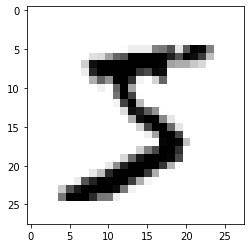

In [74]:
# Visualization
import matplotlib.pyplot as plt
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary) # Printing in 2 colors only
plt.show()

In [ ]:
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# The image is diminished because we have normalized the datapoints between 0 to 1
print(x_train[0]) # Scaled between 0 and 1

In [76]:
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_train,axis=1)
# print(x_train[0])
# Build the model
model = tf.keras.models.Sequential() # Feed forward model

model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=3) # Passes
# you can’t pass the entire dataset into the neural net at once. 
# So, you divide dataset into Number of Batches or sets or parts.
# Just like you divide a big article into multiple sets/batches/parts like Introduction, 
# Gradient descent, Epoch, Batch size and Iterations which makes it easy to read the entire
# article for the reader and understand it. 
# For xample: We can divide the dataset of 2000 examples into 
# batches of 500 then it will take 4 iterations to complete 1 epoch.

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 1.0500 - accuracy: 0.7508
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3875 - accuracy: 0.8911
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3194 - accuracy: 0.9087


In [77]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)
# loss: 0.2888 - accuracy: 0.9165

313/313 [==============================] - 0s 1ms/step - loss: 0.2907 - accuracy: 0.9173


In [78]:
# # You can save and load saved models as well using keras.

# model.save('new_model')
# load_model=tf.keras.models.load_model('new_model')

In [79]:
Prediction = model.predict([x_test])
print(Prediction) # Prints probablity distributions

Consider rewriting this model with the Functional API.
[[9.26815410e-05 3.30120969e-07 1.47278173e-04 ... 9.97121632e-01
  3.97331714e-05 1.23026839e-03]
 [3.06119188e-03 3.60828155e-04 9.75514948e-01 ... 2.57950319e-07
  1.45166565e-03 7.08520020e-07]
 [1.03324180e-06 9.95935082e-01 1.07512157e-03 ... 1.05397754e-04
  6.59454439e-04 9.90894841e-05]
 ...
 [8.66558139e-07 5.55846345e-05 1.05045219e-04 ... 2.96191801e-03
  1.77299406e-03 3.25940289e-02]
 [8.40275083e-03 2.23577168e-04 8.28779011e-04 ... 5.58179599e-05
  2.59913415e-01 4.55410685e-04]
 [1.29719777e-03 7.49237685e-08 1.58410834e-03 ... 7.32568708e-08
  4.37763538e-06 4.75242416e-07]]


In [80]:
import numpy as np
np.argmax(Prediction[0])

7

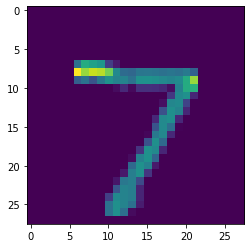

In [81]:
plt.imshow(x_test[0])

In [82]:
Prediction[0]

# On checking this array, we get different probablities of the numerics
# Probablity of getting 1 -> 5.02
# Probablity of getting 2 -> 2.67
# .
# .
# .
# Probablity of getting 7 -> 9.98 (which is max)

array([9.2681541e-05, 3.3012097e-07, 1.4727817e-04, 1.3078017e-03,
       4.5630327e-06, 5.5649962e-05, 5.3392558e-08, 9.9712163e-01,
       3.9733171e-05, 1.2302684e-03], dtype=float32)

In [83]:
# Lets change batch size!!~!!

Batch Size effect on training set

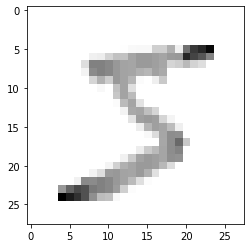

Epoch 1/3
2000/2000 [==============================] - 3s 2ms/step - loss: 1.0234 - accuracy: 0.7591
Epoch 2/3
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3825 - accuracy: 0.8927
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9187
0.28315308690071106 0.9186999797821045


In [84]:
# Changing batch size = 30 for training 
# Loss - 0.28395113348960876 Accuracy - 0.9204999804496765
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# The image is diminished because we have normalized the datapoints between 0 to 1
# print(x_train[0]) # Scaled between 0 and 1
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_train,axis=1)
# print(x_train[0])
# Build the model
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=3) # Passes
val_loss_30,val_accuracy_30=model.evaluate(x_test,y_test)
print(val_loss_30,val_accuracy_30)

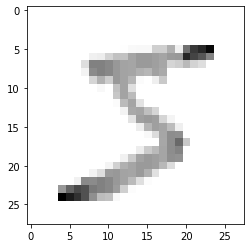

Epoch 1/3
1200/1200 [==============================] - 3s 2ms/step - loss: 1.4380 - accuracy: 0.6778
Epoch 2/3
1200/1200 [==============================] - 2s 2ms/step - loss: 0.4883 - accuracy: 0.8701
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.9078
0.3321292996406555 0.907800018787384


In [85]:
# Changing batch size = 50 for training 
# Loss - 0.33094361424446106 Accuracy - 0.909500002861023
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# The image is diminished because we have normalized the datapoints between 0 to 1
# print(x_train[0]) # Scaled between 0 and 1
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_train,axis=1)
# print(x_train[0])
# Build the model
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=50, epochs=3) # Passes
val_loss_50,val_accuracy_50=model.evaluate(x_test,y_test)
print(val_loss_50,val_accuracy_50)

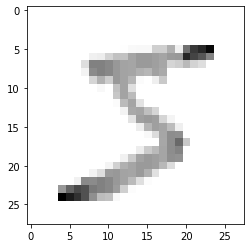

Epoch 1/3
600/600 [==============================] - 1s 2ms/step - loss: 1.9166 - accuracy: 0.5563
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.8686 - accuracy: 0.8160
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.4556 - accuracy: 0.8836
0.455565482378006 0.8835999965667725


In [86]:
# Changing batch size = 100 for training 
# Loss - 0.47130557894706726, Accuracy - 0.8769999742507935
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# The image is diminished because we have normalized the datapoints between 0 to 1
# print(x_train[0]) # Scaled between 0 and 1
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_train,axis=1)
# print(x_train[0])
# Build the model
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=100, epochs=3) # Passes
val_loss_100,val_accuracy_100=model.evaluate(x_test,y_test)
print(val_loss_100,val_accuracy_100)

1.  batch size, 30 Loss - 0.28395113348960876 Accuracy - 0.9204999804496765

2.  batch size, 50 Loss - 0.33094361424446106 Accuracy - 0.909500002861023

3.  batch size, 100 Loss - 0.47130557894706726, Accuracy - 0.8769999742507935

As observed, Loss is increasing as we increasing batch size and Accuracy is decreasing


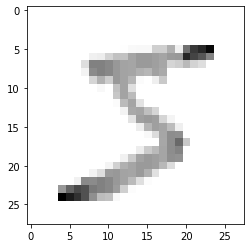

Epoch 1/3
60/60 [==============================] - 1s 14ms/step - loss: 2.3071 - accuracy: 0.1242
Epoch 2/3
60/60 [==============================] - 1s 13ms/step - loss: 2.2628 - accuracy: 0.2435
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 2.1855 - accuracy: 0.3463
2.1854629516601562 0.34630000591278076


In [87]:
# Lets try for larger batch size now
# Changing batch size = 1000 for training 
# Loss - 2.151988983154297 Accuracy - 0.44769999384880066
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# The image is diminished because we have normalized the datapoints between 0 to 1
# print(x_train[0]) # Scaled between 0 and 1
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_train,axis=1)
# print(x_train[0])
# Build the model
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=1000, epochs=3) # Passes
val_loss_1000,val_accuracy_1000=model.evaluate(x_test,y_test)
print(val_loss_1000,val_accuracy_1000)

Hence we can say that as we incrrease the batch size we get poor results.

for batch size 1000, Loss - 2.151988983154297 Accuracy - 0.44769999384880066

Batch Size effect in test set

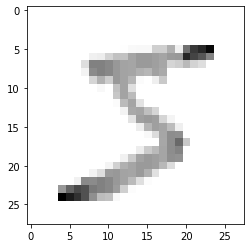

Epoch 1/3
2000/2000 [==============================] - 3s 2ms/step - loss: 1.0097 - accuracy: 0.7777
Epoch 2/3
2000/2000 [==============================] - 3s 2ms/step - loss: 0.3803 - accuracy: 0.8925
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.9208
0.2823778986930847 0.920799970626831
200/200 [==============================] - 0s 2ms/step - loss: 0.2824 - accuracy: 0.9208
0.2823779582977295 0.920799970626831
0.28237780928611755 0.920799970626831
0.28237804770469666 0.920799970626831
0.2823779284954071 0.920799970626831
0.28237786889076233 0.920799970626831


In [88]:
# impact the batch_size has when evaluating the model on a test set
# it is relevant for training as it determines the number of samples to be fed
# to the network before computing the next gradient.
# Changing batch size = 30 for training 
# Loss - 0.28395113348960876 Accuracy - 0.9204999804496765
(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

# The image is diminished because we have normalized the datapoints between 0 to 1
# print(x_train[0]) # Scaled between 0 and 1
# (x_train, y_train), (x_test,y_test) = mnist.load_data()
# x_train = tf.keras.utils.normalize(x_train,axis=1)
# x_test = tf.keras.utils.normalize(x_train,axis=1)
# print(x_train[0])
# Build the model
model = tf.keras.models.Sequential() # Feed forward model
model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=30, epochs=3) # Passes
val_loss_30,val_accuracy_30=model.evaluate(x_test,y_test)
print(val_loss_30,val_accuracy_30)


val_loss2,val_accuracy2=model.evaluate(x_test, y_test, batch_size = 10)
val_loss3,val_accuracy3=model.evaluate(x_test, y_test, batch_size = 20)
val_loss4,val_accuracy4=model.evaluate(x_test, y_test, batch_size = 30)
val_loss5,val_accuracy5=model.evaluate(x_test, y_test, batch_size = 40)
val_loss6,val_accuracy6=model.evaluate(x_test, y_test, batch_size = 50)
print(val_loss2,val_accuracy2)
print(val_loss3,val_accuracy3)
print(val_loss4,val_accuracy4)
print(val_loss5,val_accuracy5)
print(val_loss6,val_accuracy6)

In testing, loss and accuracy remains same even changing multiple 

# Part 2 - New Images by **inverting black and white pixels**

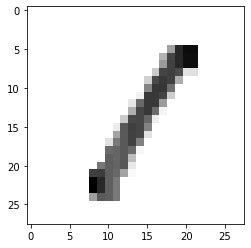

In [40]:
# Flipping the colors that is BW to WB
# In order to invert the pixels we just have to subtract 255
import numpy as np

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
plt.imshow(x_train[3], cmap=plt.cm.binary)
plt.show()


In [46]:

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# data=pd.read_csv("https://raw.githubusercontent.com/sjwhitworth/golearn/master/examples/datasets/mnist_train.csv")
# data.values[:, 1:] = np.abs(data.values[:, 1:] - 255)  # color inversion
# x=data.values[-1, 1:]  # plot latest row in the dataset
# plt.imshow(x.reshape(28, 28), cmap='gray')
# plt.show()

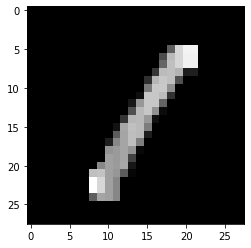

In [55]:
# Displaying the inverted image

(x_train, y_train), (x_test,y_test) = mnist.load_data()
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
# print(x_train[0])
x_train_inverted = np.abs(x_train - 255)
plt.imshow(x_train_inverted[3], cmap=plt.cm.binary)
plt.show()

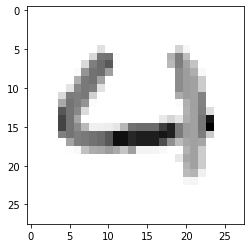

In [56]:
plt.imshow(x_train[60], cmap=plt.cm.binary)


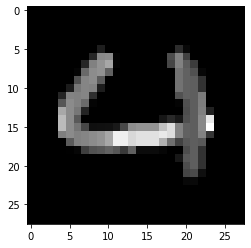

In [57]:
plt.imshow(x_train_inverted[60], cmap=plt.cm.binary)


In [58]:
# Since underlying number of the image remains same, we do not require to change the y labels.

In [59]:
# Performing the training

# Build the model
model = tf.keras.models.Sequential() # Feed forward model

model.add(tf.keras.layers.Flatten()) # used for input layer to flatten it
# 128 neurons and activation function to be rectified linear
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Output layer with 10 classifications
# Softmax for probablity distribution
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

# Training
# Use thie crossentropy loss function when there are two or more label classes. 
# It expect labels to be provided in a one_hot representation. 
# If you want to provide labels as integers, please use 
# SparseCategoricalCrossentropy loss. There should be # classes floating point 
# values per feature.
model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_inverted, y_train, epochs=3) # Passes
# you can’t pass the entire dataset into the neural net at once. 
# So, you divide dataset into Number of Batches or sets or parts.
# Just like you divide a big article into multiple sets/batches/parts like Introduction, 
# Gradient descent, Epoch, Batch size and Iterations which makes it easy to read the entire
# article for the reader and understand it. 
# For xample: We can divide the dataset of 2000 examples into 
# batches of 500 then it will take 4 iterations to complete 1 epoch.

# Performing the test on inverted training iamges
# Testing images are not pixel flipped or inverted.
val_loss,val_accuracy=model.evaluate(x_test,y_test) 

print(val_loss,val_accuracy)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 1369868.7500 - accuracy: 0.1119
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 225.1785 - accuracy: 0.0761
225.17845153808594 0.07609999924898148


In [ ]:

Prediction = model.predict([x_test])
print(Prediction) # Prints probablity distributions


In [64]:
import numpy as np
np.argmax(Prediction[3])

5

The flipping of images with their colors from B to W or W to b has changed our results drastically. We are getting a large amount of loss as well as negligible accuracy in our model. Loss - 225.17845153808594, Accuracy - 0.07609999924898148

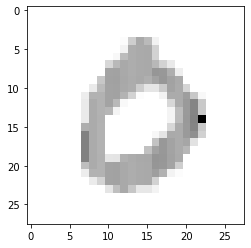

In [65]:
# Let us flip the pixels of test images as well. 
plt.imshow(x_test[3], cmap=plt.cm.binary)


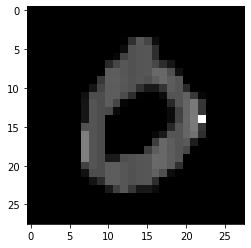

In [66]:
x_test_inverted = np.abs(x_test-255)
plt.imshow(x_test_inverted[3], cmap=plt.cm.binary)



In [71]:

model = tf.keras.models.Sequential() # Feed forward model

model.add(tf.keras.layers.Flatten()) 
# Layer 1 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
# Layer 2 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer="SGD",loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train_inverted, y_train, batch_size=20, epochs=3) # Passes

val_loss,val_accuracy=model.evaluate(x_test_inverted,y_test) 

print(val_loss,val_accuracy)

Epoch 1/3
3000/3000 [==============================] - 6s 2ms/step - loss: 292.2861 - accuracy: 0.1117
Epoch 2/3
3000/3000 [==============================] - 5s 2ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 2.3011 - accuracy: 0.1135
2.3010590076446533 0.11349999904632568


In [89]:

Prediction = model.predict([x_test_inverted])
# print(Prediction) # Prints probablity distributions
import numpy as np
np.argmax(Prediction[3])

Consider rewriting this model with the Functional API.


2